<a href="https://colab.research.google.com/github/tutalae/BTC/blob/master/5Forex_Uncorr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

How to create a stock correlation matrix in python
from
https://medium.com/analytics-vidhya/how-to-create-a-stock-correlation-matrix-in-python-4f32f8cb5b50

In [2]:
#Import the libraries
import numpy as np 
import pandas as pd 
# Used to grab the stock prices, with yahoo 
import pandas_datareader as web 
from datetime import datetime 
# To visualize the results 
import matplotlib.pyplot as plt 
import seaborn

In [58]:
#Select the list of tickers and select the daterange
start = datetime(2012, 1, 1)
symbols_list = ['EURUSD=X', 'USDJPY=X', 'GBPUSD=X',"AUDUSD=X" , 'USDCAD=X', 'USDCHF=X', 'NZDUSD=X', 'EURJPY=X', 'GBPJPY=X', 
                'EURGBP=X', 'AUDJPY=X']
#array to store prices
symbols=[]

In [59]:
#Pull stock prices, push into clean dataframe
#array to store prices
symbols=[]
for ticker in symbols_list:     
    r = web.DataReader(ticker, 'yahoo', start)   
    # add a symbol column   
    r['Symbol'] = ticker    
    symbols.append(r)
# concatenate into df
df = pd.concat(symbols)
df = df.reset_index()
df = df[['Date', 'Close', 'Symbol']]
df.head()
df_pivot=df.pivot('Date','Symbol','Close').reset_index()
df_pivot.head()

Symbol,Date,AUDJPY=X,AUDUSD=X,EURGBP=X,EURJPY=X,EURUSD=X,GBPJPY=X,GBPUSD=X,NZDUSD=X,USDCAD=X,USDCHF=X,USDJPY=X
0,2012-01-02,78.419998,1.020804,0.8331,99.610001,1.296008,119.519997,1.551205,0.778695,1.0209,0.9381,77.019997
1,2012-01-03,78.853104,1.025399,0.8336,99.531998,1.294096,119.370003,1.552000,0.781006,1.0174,0.9394,76.930000
2,2012-01-04,79.540001,1.037000,0.8342,100.146004,1.305602,120.010002,1.564407,0.790389,1.0111,0.9319,76.722000
3,2012-01-05,79.290001,1.034126,0.8284,99.190002,1.293142,119.703003,1.560939,0.786596,1.0134,0.9421,76.709999
4,2012-01-06,79.098701,1.025704,0.8252,98.707001,1.279607,119.570000,1.550171,0.781189,1.0196,0.9521,77.151001


In [60]:
#Now, we can run the correlation. Using the Pandas ‘corr’ function to compute the Pearson correlation coeffecient between each pair of equities
corr_df = df_pivot.corr(method='pearson')
#reset symbol as index (rather than 0-X)
corr_df.head().reset_index()
#del corr_df.index.name
corr_df.head(10)

Symbol,AUDJPY=X,AUDUSD=X,EURGBP=X,EURJPY=X,EURUSD=X,GBPJPY=X,GBPUSD=X,NZDUSD=X,USDCAD=X,USDCHF=X,USDJPY=X
Symbol,,,,,,,,,,,
AUDJPY=X,1.000000,0.560175,-0.469271,0.556910,0.531951,0.663166,0.709602,0.707595,-0.570430,-0.335175,0.065486
AUDUSD=X,0.560175,1.000000,-0.217738,-0.253819,0.824703,-0.094126,0.769557,0.914786,-0.968393,-0.516173,-0.785169
EURGBP=X,-0.469271,-0.217738,1.000000,-0.135652,0.006115,-0.680302,-0.641168,-0.219462,0.219196,0.020146,-0.142993
EURJPY=X,0.556910,-0.253819,-0.135652,1.000000,0.122711,0.816087,0.185332,0.029497,0.157519,-0.173521,0.689296
EURUSD=X,0.531951,0.824703,0.006115,0.122711,1.000000,0.050456,0.762627,0.863707,-0.872155,-0.747646,-0.632923
GBPJPY=X,0.663166,-0.094126,-0.680302,0.816087,0.050456,1.000000,0.482528,0.112839,0.022962,-0.124826,0.618278
GBPUSD=X,0.709602,0.769557,-0.641168,0.185332,0.762627,0.482528,1.000000,0.800923,-0.808171,-0.590916,-0.389639
NZDUSD=X,0.707595,0.914786,-0.219462,0.029497,0.863707,0.112839,0.800923,1.000000,-0.907996,-0.603394,-0.597348
USDCAD=X,-0.570430,-0.968393,0.219196,0.157519,-0.872155,0.022962,-0.808171,-0.907996,1.000000,0.573977,0.747111


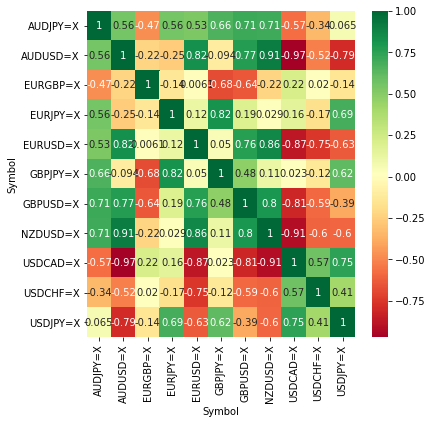

In [61]:
# Finally, we can plot a heatmap of the correlations (with Seaborn and Matplotlib) to better visualize the results:
fig, ax = plt.subplots(figsize=(6,6)) 
ax = seaborn.heatmap(corr_df, annot=True, cmap="RdYlGn")

In [66]:
corr_df.min()

Symbol
AUDJPY=X   -0.570430
AUDUSD=X   -0.968393
EURGBP=X   -0.680302
EURJPY=X   -0.253819
EURUSD=X   -0.872155
GBPJPY=X   -0.680302
GBPUSD=X   -0.808171
NZDUSD=X   -0.907996
USDCAD=X   -0.968393
USDCHF=X   -0.747646
USDJPY=X   -0.785169
dtype: float64

max 
1. USDCAD=X , AUDUSD=X =  -0.968393
2. NZDUSD=X   -0.907996
3. EURUSD=X   -0.872155
4. GBPUSD=X   -0.808171
5. USDCHF=X   -0.747646



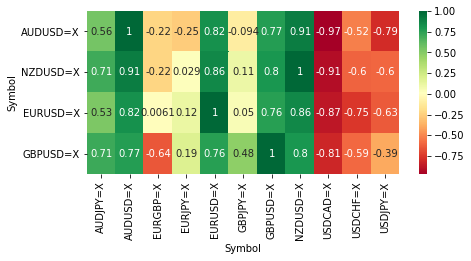

In [107]:
# 1. USDCAD=X , AUDUSD=X = -0.968393
uncorr1 = corr_df.nlargest(4, "AUDUSD=X")
fig, ax = plt.subplots(figsize=(7,3)) 
ax = seaborn.heatmap(uncorr1, annot=True, cmap="RdYlGn")

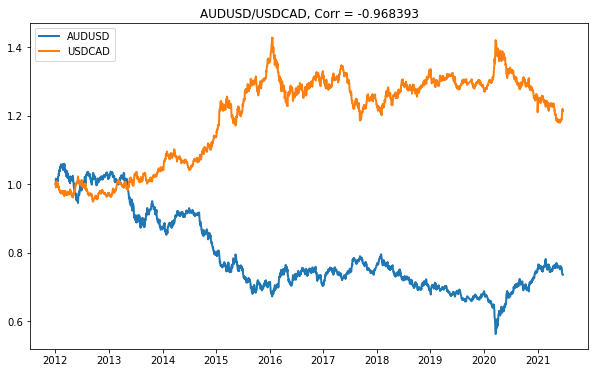

In [75]:
fig, ax = plt.subplots(figsize=(10,6)) 

d = df_pivot["Date"]
t = df_pivot["AUDUSD=X"]/df_pivot["AUDUSD=X"].iloc[0]
s = df_pivot["USDCAD=X"]/df_pivot["USDCAD=X"].iloc[0]

plt.title("AUDUSD/USDCAD Corr = -0.968393")
line, = plt.plot(d, t, lw=2, label='AUDUSD')
line, = plt.plot(d, s, lw=2, label='USDCAD')
plt.legend()
plt.show()

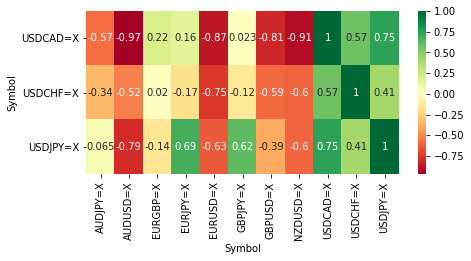

In [108]:
# 2. NZDUSD=X -0.907996
uncorr2 = corr_df.nsmallest(3, "NZDUSD=X")
fig, ax = plt.subplots(figsize=(7,3)) 
ax = seaborn.heatmap(uncorr2, annot=True, cmap="RdYlGn")

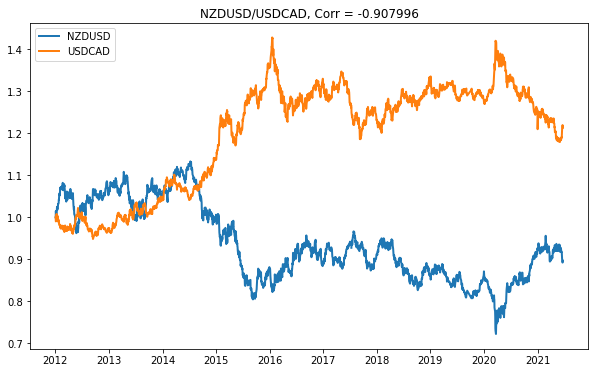

In [97]:
fig, ax = plt.subplots(figsize=(10,6)) 

d = df_pivot["Date"]
t = df_pivot["NZDUSD=X"]/df_pivot["NZDUSD=X"].iloc[0]
s = df_pivot["USDCAD=X"]/df_pivot["USDCAD=X"].iloc[0]

plt.title("NZDUSD/USDCAD, Corr = -0.907996")
line, = plt.plot(d, t, lw=2, label='NZDUSD')
line, = plt.plot(d, s, lw=2, label='USDCAD')
plt.legend()
plt.show()

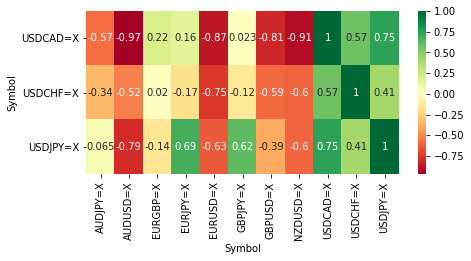

In [110]:
# 3. EURUSD=X -0.872155
uncorr3 = corr_df.nsmallest(3, "EURUSD=X")
fig, ax = plt.subplots(figsize=(7,3)) 
ax = seaborn.heatmap(uncorr3, annot=True, cmap="RdYlGn")

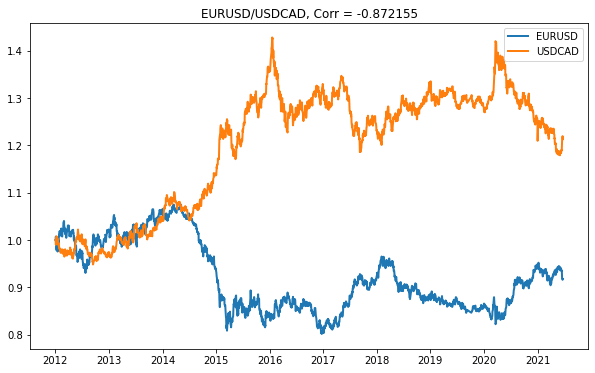

In [96]:
fig, ax = plt.subplots(figsize=(10,6)) 

d = df_pivot["Date"]
t = df_pivot["EURUSD=X"]/df_pivot["EURUSD=X"].iloc[0]
s = df_pivot["USDCAD=X"]/df_pivot["USDCAD=X"].iloc[0]

plt.title("EURUSD/USDCAD, Corr = -0.872155")
line, = plt.plot(d, t, lw=2, label='EURUSD')
line, = plt.plot(d, s, lw=2, label='USDCAD')
plt.legend()
plt.show()

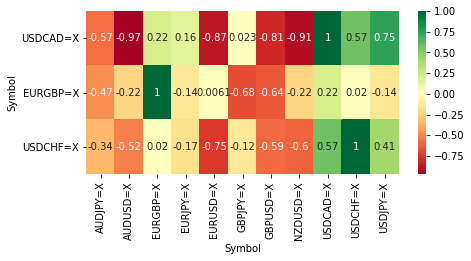

In [111]:
# 4. GBPUSD=X -0.808171
uncorr4 = corr_df.nsmallest(3, "GBPUSD=X")
fig, ax = plt.subplots(figsize=(7,3)) 
ax = seaborn.heatmap(uncorr4, annot=True, cmap="RdYlGn")

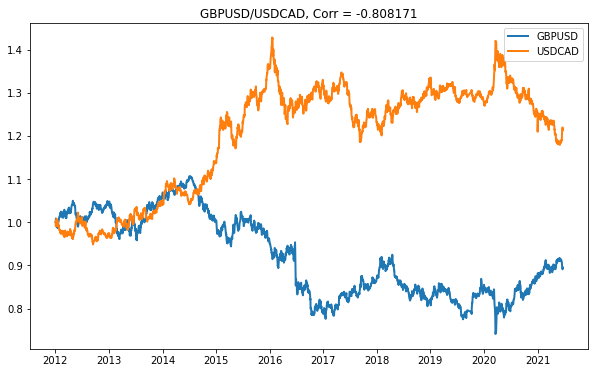

In [95]:
fig, ax = plt.subplots(figsize=(10,6)) 

d = df_pivot["Date"]
t = df_pivot["GBPUSD=X"]/df_pivot["GBPUSD=X"].iloc[0]
s = df_pivot["USDCAD=X"]/df_pivot["USDCAD=X"].iloc[0]

plt.title("GBPUSD/USDCAD, Corr = -0.808171")
line, = plt.plot(d, t, lw=2, label='GBPUSD')
line, = plt.plot(d, s, lw=2, label='USDCAD')
plt.legend()
plt.show()

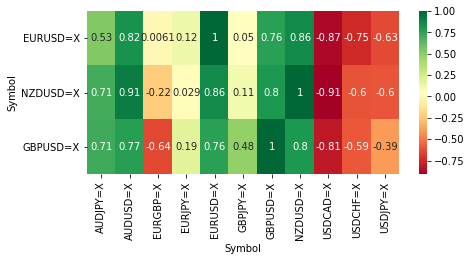

In [113]:
# 5. USDCHF=X -0.747646
uncorr5 = corr_df.nsmallest(3, "USDCHF=X")
fig, ax = plt.subplots(figsize=(7,3)) 
ax = seaborn.heatmap(uncorr5, annot=True, cmap="RdYlGn")


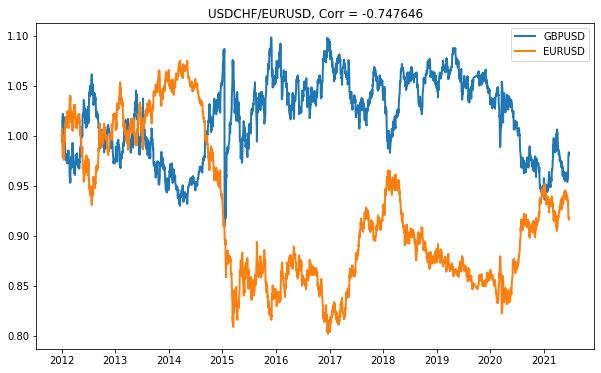

In [99]:
fig, ax = plt.subplots(figsize=(10,6)) 

d = df_pivot["Date"]
t = df_pivot["USDCHF=X"]/df_pivot["USDCHF=X"].iloc[0]
s = df_pivot["EURUSD=X"]/df_pivot["EURUSD=X"].iloc[0]

plt.title("USDCHF/EURUSD, Corr = -0.747646")
line, = plt.plot(d, t, lw=2, label='GBPUSD')
line, = plt.plot(d, s, lw=2, label='EURUSD')
plt.legend()
plt.show()